In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import os
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

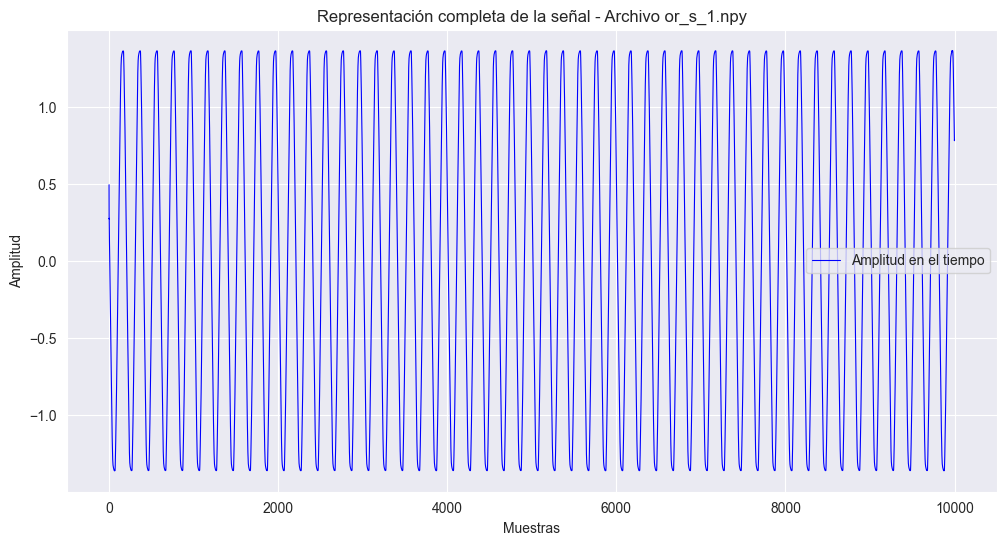

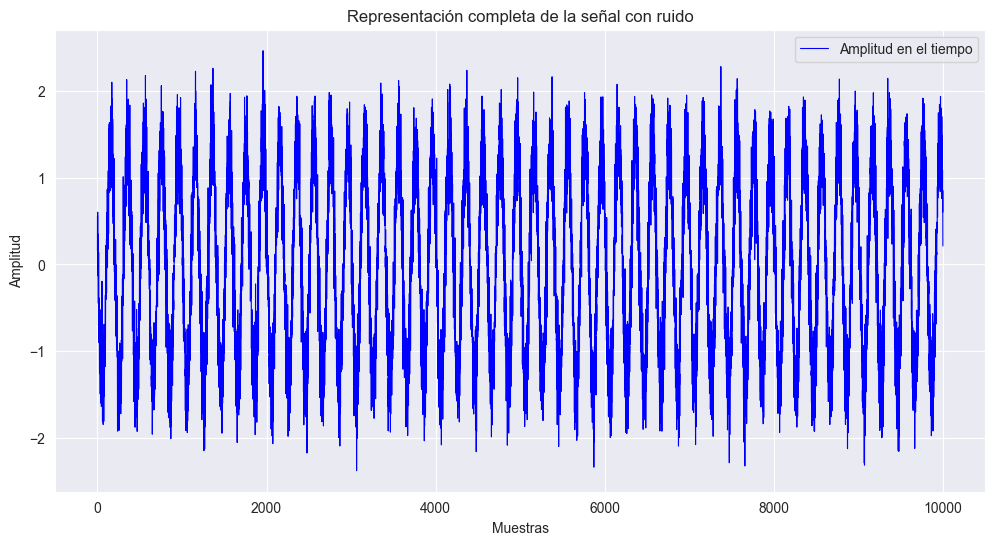

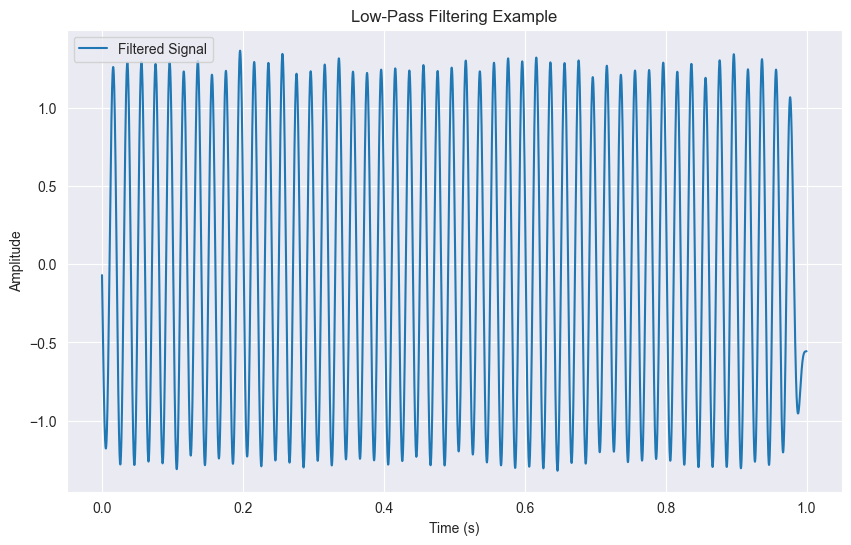

In [25]:
directorio_actual = os.path.dirname(os.path.abspath('TesisSergioAguado'))
archivo_path = os.path.join(os.getcwd(), 'data','original_signals','train',f'or_s_1.npy')

# Cargar el archivo completo
signal = np.load(archivo_path)    

# Seleccionamos un objetivo de Ruido.
Obj_snr_db = 10
# Calculamos el poder de la señal y la pasamos a dB
# Necesitamos calcular la potencia, en este caso sería:
x_watts = signal ** 2
    
#Antes de sacar las características, se le añade ruido en el siguiente fragmento de código.
# --------------        
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - Obj_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generamos una muestra de ruido blanco.
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Sumamos el ruido a la señal
signal_20dB = signal + noise_volts
# -------------- 
# Aplicamos un filtro de paso bajo para eliminar el ruido de alta frecuencia.

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal - Archivo or_s_1.npy")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal_20dB, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal con ruido")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# Parámetros del filtro
cutoff_freq = 60  # Frecuencia de corte en Hz
fs = 10000  # Frecuencia de muestreo en Hz
order = 6  # Orden del filtro

# Diseñar el filtro de paso bajo
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype='lowpass')

# Aplicar el filtro
filtered_data = filtfilt(b, a, signal_20dB)

# Crear un vector de tiempo (en función del número de muestras)
t = np.arange(len(signal)) / fs  # Tiempo en segundos 
# Plot the original and filtered data
plt.figure(figsize=(10, 6))

#plt.plot(t, signal_20dB, label='Original Signal')
plt.plot(t, filtered_data, label='Filtered Signal')
    
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Low-Pass Filtering Example')
plt.legend()
plt.grid(True)

plt.show()